<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/8_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

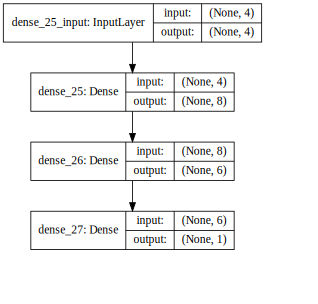

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

model = Sequential()
#Dense(units=8, input_dim = 4, kernel_initializer='uniform', activation= 'relu'))
# 첫번째 인자 units: 출력 뉴런의 수를 설정 input_dim: 입력 뉴런의 수를 설정
# kernel_initializer: 가중치 초기화 방법 설정 'uniform' : 균일분포, 'normal': 가우시안 분포
# activation: 활성화 함수 설정 linear(디폴트) - 입력 = 출력, relu - 주로 은닉층, sigmoid- 이진 분류 주로 출력층, softmax- 다중 클래스 분류 주로 출력층

model.add(Dense(8, input_dim=4, kernel_initializer="uniform", activation='relu'))
model.add(Dense(6, kernel_initializer="uniform", activation='relu'))
model.add(Dense(1, kernel_initializer="uniform", activation='sigmoid'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi=60).create(prog='dot', format='svg'))

In [ ]:
# 0 사용할 패키지 불러오기
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes.csv")
print(df.values)
print(df.values.shape)

# 랜덤시드 고정시키기
np.random.seed(5)

#1 데이터 준비하기
# dataset - np.loadtxt("/content/drive/My Drive/Colab Notebooks/diabetes.csv", delimiter=",")


#3. 모델 구성하기
model = Sequential()
model.add(Dense(24, input_dim=8, kernel_initializer="uniform", activation='relu'))
model.add(Dense(12, kernel_initializer="uniform", activation='relu'))
model.add(Dense(8, kernel_initializer="uniform", activation='relu'))
model.add(Dense(1, kernel_initializer="uniform", activation='sigmoid'))

# #2 데이터셋 생성하기
dataset = df.values
# Training and testing dataset 분리, 필요시 validation dataset 분리

# Training dataset
x_train = dataset[:600,:-1]
y_train = dataset[:600,-1]

# Validation dataset
x_val = dataset[600:700,:-1]
y_val = dataset[600:700,-1]

# testing dataset
x_test = dataset[700:,:-1]
y_test = dataset[700:,-1]

#4 모델컴파일 학습과정 설정하기
# loss 현재 가중치 세트 평가하는데 사용한 손실 함수.
# optimizer 최적의 가중치 검색하는데 사용되는 최적화 알고리즘 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용
# metrics 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi = 60).create(prog='dot', format='svg'))

#5 모델 학습시키기
model.fit(x_train, y_train, epochs=500, batch_size=64)

#6모델 평가하기
scores = model.evaluate(x_test, y_test)
print("acc: %f" %(scores[1]*100))

#7 모델 사용하기
predicts =model.predict(x_test)
print(predicts[:10])
print(y_test[:10])

Using TensorFlow backend.


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
(768, 9)
Epoch 1/500
600/600 [==============================] - 0s 520us/step - loss: 0.6923 - accuracy: 0.6283
Epoch 2/500
600/600 [==============================] - 0s 27us/step - loss: 0.6900 - accuracy: 0.6533
Epoch 3/500
600/600 [==============================] - 0s 23us/step - loss: 0.6860 - accuracy: 0.6533
Epoch 4/500
600/600 [==============================] - 0s 25us/step - loss: 0.6790 - accuracy: 0.6533
Epoch 5/500
600/600 [==============================] - 0s 26us/step - loss: 0.6702 - accuracy: 0.6533
Epoch 6/500
600/600 [==============================] - 0s 34us/step - loss: 0.6659 - accuracy: 0.6533
Epoch 7/500
600/600 [=====================

# 새 섹션